In [1]:
#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.simplefilter("ignore")

In [2]:
#Read the Dataset
climate = pd.read_excel("Boston_Climate.xlsx")

In [3]:
#Displaying the first five rows of the dataset
climate.head()

,Date,Temp_Avg
0,2016-01-01,32.5
1,2016-02-01,34.7
2,2016-03-01,42.5
3,2016-04-01,47.1
4,2016-05-01,58.6


In [4]:
#To find the statistics of the dataset
climate.describe()

,Temp_Avg
count,96.000000
mean,53.460417
std,15.450992
min,27.400000
25%,38.850000
50%,53.050000
75%,67.925000
max,78.700000


In [5]:
#To find whether there are any existing null values or not
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      96 non-null     datetime64[ns]
 1   Temp_Avg  96 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [6]:
#Count of duplicated rows
climate[climate.duplicated()]

,Date,Temp_Avg


Text(0.5, 1.0, "Box Plot of Boston's Average Temperature for Outlier Detection")

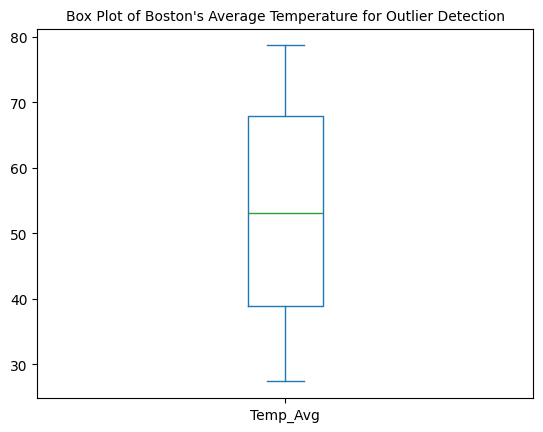

In [7]:
#Outlier Detection
climate.plot(kind='box')
plt.title("Box Plot of Boston's Average Temperature for Outlier Detection", fontsize=10)

In [8]:
#Change Date column as index
climate['Date'] = pd.to_datetime(climate['Date'])
climate.set_index('Date', inplace=True)

Text(0.5, 1.0, 'Time Series Plot - Average Temperature of Boston')

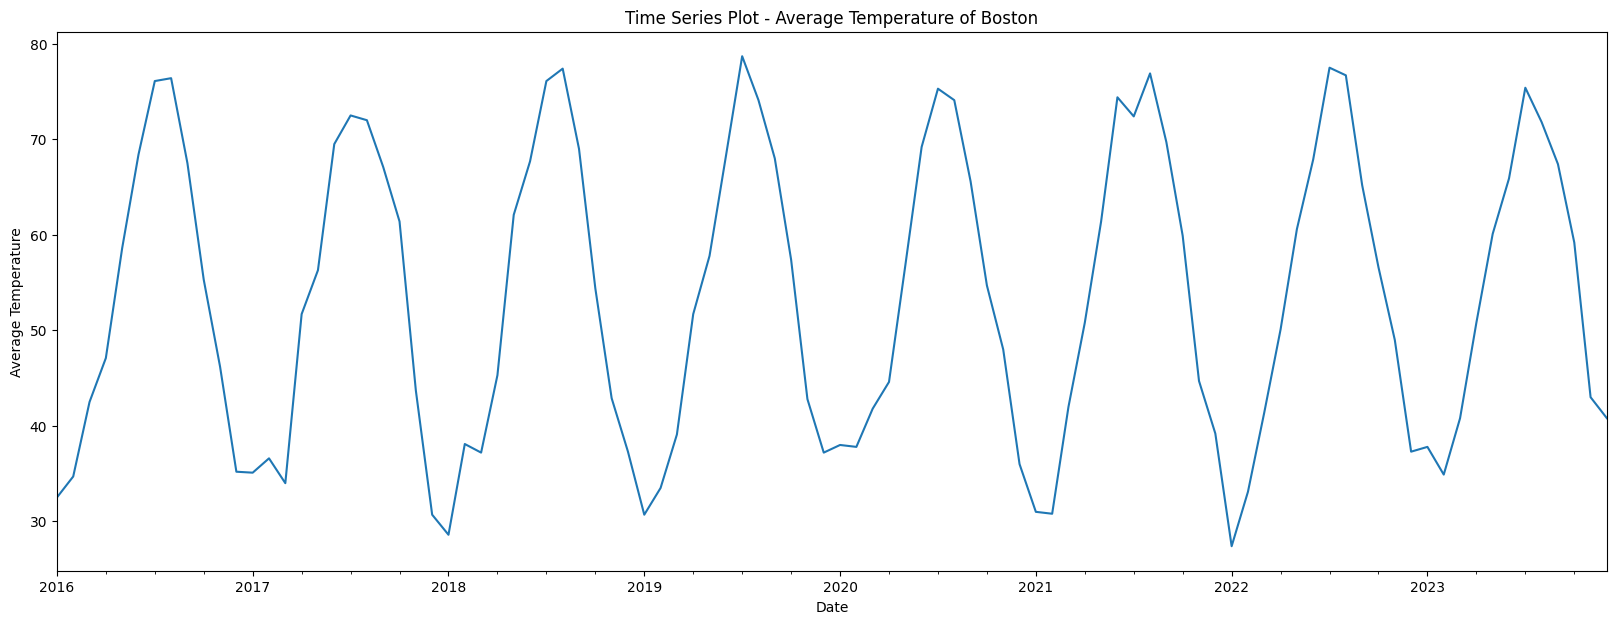

In [9]:
#Time Plot of 'Temp_Avg'
fig= plt.figure(figsize=(20,7))
climate["Temp_Avg"].plot()
plt.ylabel('Average Temperature')
plt.title('Time Series Plot - Average Temperature of Boston')

# Time series decomposition plot


<Figure size 4000x2000 with 0 Axes>

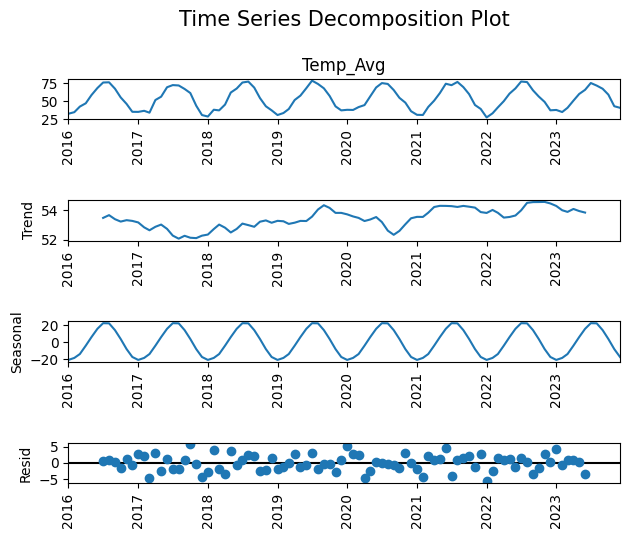

In [10]:
fig = plt.figure(figsize=(40, 20))

decompose_ts_add = seasonal_decompose(climate["Temp_Avg"], period=12)
decompose_plot = decompose_ts_add.plot()

#Rotate x-axis ticks by 90 degrees for all subplots
for ax in decompose_plot.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#Increase space between each subplot
plt.subplots_adjust(hspace=2)

plt.title("Time Series Decomposition Plot", fontsize=15, loc='center', pad=300)

plt.show()

# ACF plots and PACF plots


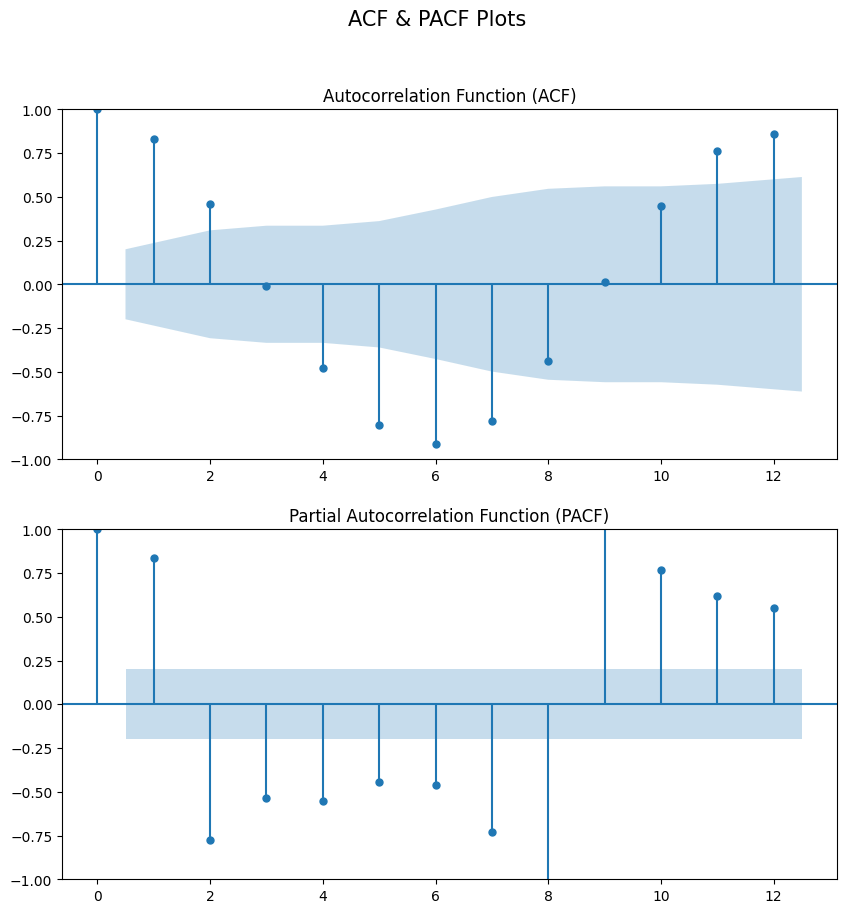

In [11]:
#Plotting autocorrelation and partial autocorrelation for the 'Temp_Avg' column
import statsmodels.graphics.tsaplots as tsa_plots
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(211, aspect='auto')
tsa_plots.plot_acf(climate["Temp_Avg"], lags=12, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

ax2 = fig.add_subplot(212, aspect='auto')
tsa_plots.plot_pacf(climate["Temp_Avg"], lags=12, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.suptitle("ACF & PACF Plots", fontsize=15)

plt.show()

Splitting Data

In [12]:
#Split the data into training and testing sets
train_size = int(len(climate) * 0.8)  # 80% for training, 20% for testing
Train, Test = climate[:train_size], climate[train_size:]

# 1. Exponential Smoothing Methods

### Evaluation Metric MAPE

In [13]:
#Function to calculate the Mean Absolute Percentage Error (MAPE) between predicted 'pred' and observed 'org' values
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [14]:
Train

,Temp_Avg
Date,
2016-01-01,32.5
2016-02-01,34.7
2016-03-01,42.5
2016-04-01,47.1
2016-05-01,58.6
...,...
2021-12-01,39.2
2022-01-01,27.4
2022-02-01,33.1


In [15]:
Test

,Temp_Avg
Date,
2022-05-01,60.6
2022-06-01,67.9
2022-07-01,77.5
2022-08-01,76.7
2022-09-01,65.2
2022-10-01,56.6
2022-11-01,49.0
2022-12-01,37.3
2023-01-01,37.8


### Simple Exponential Method


In [16]:
#Simple Exponential Smoothing (SES) model fitting and prediction
ses_model = SimpleExpSmoothing(Train["Temp_Avg"].astype('double')).fit(smoothing_level=1)
pred_ses = np.array(ses_model.predict(start = Test.index[0],end = Test.index[-1]))
print(pred_ses.shape)
print(Test["Temp_Avg"].shape)

(20,)
(20,)


In [17]:
#Function to calculate MAPE values
def MAPE(pred, org):
    if pred.shape != org.shape:
        # Handle shape mismatch or reshape arrays if needed
        min_length = min(pred.shape[0], org.shape[0])
        pred = pred[:min_length]
        org = org[:min_length]

    temp = np.abs((pred - org) / org) * 100
    return np.mean(temp)

In [18]:
#MAPE Value for SES Model
mape_ses_model = MAPE(pred_ses, np.array(Test["Temp_Avg"]))
print(f"MAPE for SES Method: {mape_ses_model}")

MAPE for SES Method: 23.489184270408423


In [19]:
ses_model.summary()

Dep. Variable:,Temp_Avg,No. Observations:,76
Model:,SimpleExpSmoothing,SSE,5783.500
Optimized:,True,AIC,333.234
Trend:,None,BIC,337.896
Seasonal:,None,AICC,333.798
Seasonal Periods:,None,Date:,"Mon, 15 Apr 2024"
Box-Cox:,False,Time:,22:18:42
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
initial_level,32.500000,l.0,True


### Holt's method

In [20]:
#Holt method
from statsmodels.tsa.holtwinters import Holt

#Update smoothing_slope to smoothing_trend
holt_model = Holt(Train["Temp_Avg"].astype('double')).fit(smoothing_level=0.8, smoothing_trend=0.2)

#Predict using the model
pred_holt = holt_model.predict(start=Test.index[0], end=Test.index[-1])

#Calculate and print MAPE
mape_holt_model = MAPE(pred_holt, Test["Temp_Avg"])
print(f"MAPE for Holt method: {mape_holt_model}")

MAPE for Holt method: 24.516814905525774


In [21]:
holt_model.summary()

Dep. Variable:,Temp_Avg,No. Observations:,76
Model:,Holt,SSE,8815.071
Optimized:,True,AIC,369.265
Trend:,Additive,BIC,378.588
Seasonal:,None,AICC,370.482
Seasonal Periods:,None,Date:,"Mon, 15 Apr 2024"
Box-Cox:,False,Time:,22:18:42
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8000000,alpha,False
smoothing_trend,0.2000000,beta,False


### Holt-Winter's exponential smoothing with additive seasonality and additive trend


In [22]:
#Fitting a Holt-Winters Exponential Smoothing model with additive trend and additive seasonality to the training data
hwe_model_add_add = ExponentialSmoothing(Train["Temp_Avg"].astype('double'),seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_model_add_add = MAPE(pred_hwe_add_add,Test["Temp_Avg"])
mape_hwe_model_add_add

3.9478665894732017

In [23]:
hwe_model_add_add.summary()

Dep. Variable:,Temp_Avg,No. Observations:,76
Model:,ExponentialSmoothing,SSE,459.863
Optimized:,True,AIC,168.815
Trend:,Additive,BIC,206.107
Seasonal:,Additive,AICC,180.815
Seasonal Periods:,12,Date:,"Mon, 15 Apr 2024"
Box-Cox:,False,Time:,22:18:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.6601e-08,alpha,True
smoothing_trend,7.3444e-09,beta,True


### Holt-Winter's exponential smoothing with multiplicative seasonality and additive trend

In [24]:
#Fitting a Holt-Winters Exponential Smoothing model with multiplicative seasonality and additive trend to the training data
hwe_model_mul_add = ExponentialSmoothing(Train["Temp_Avg"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_model_mul_add=MAPE(pred_hwe_mul_add,Test["Temp_Avg"])
mape_hwe_model_mul_add

4.064312168502953

In [25]:
hwe_model_mul_add.summary()

Dep. Variable:,Temp_Avg,No. Observations:,76
Model:,ExponentialSmoothing,SSE,457.892
Optimized:,True,AIC,168.488
Trend:,Additive,BIC,205.780
Seasonal:,Multiplicative,AICC,180.488
Seasonal Periods:,12,Date:,"Mon, 15 Apr 2024"
Box-Cox:,False,Time:,22:18:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.505e-08,alpha,True
smoothing_trend,9.418e-09,beta,True


Comparison of Results

In [26]:
#Compare the results 
data = {"MODEL":pd.Series(["ses_model","holt_model","hwe_model_add_add","hwe_model_mul_add"]),"MAPE_Values":pd.Series([mape_ses_model,mape_holt_model,mape_hwe_model_add_add,mape_hwe_model_mul_add])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['MAPE_Values'])

,MODEL,MAPE_Values
2,hwe_model_add_add,3.947867
3,hwe_model_mul_add,4.064312
0,ses_model,23.489184
1,holt_model,24.516815


## Based on the least MAPE value: Final Model (Holts winter exponential smoothing with additive seasonality and additive trend) Plot on Test Data

In [27]:
#Fitting a Holt-Winters Exponential Smoothing model with additive trend and additive seasonality to the training data
hwe_model_add_add = ExponentialSmoothing(Train["Temp_Avg"].astype('double'),seasonal="add",trend="add",seasonal_periods=12).fit()

In [28]:
#Generating forecast values using the trained Holt-Winters Exponential Smoothing model with additive trend and additive seasonality
forecast = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])

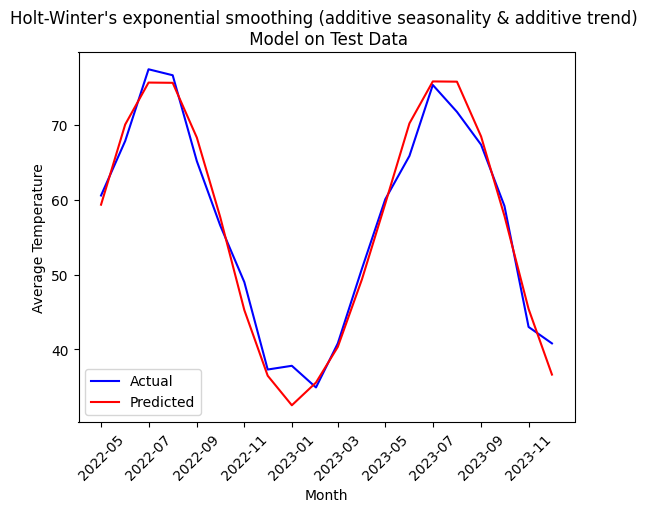

In [29]:
#Plot the actual vs predicted values of the Test data
import matplotlib.pyplot as plt

plt.plot(Test['Temp_Avg'], color = 'blue', label='Actual')
plt.plot(forecast, color='red', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title(f"Holt-Winter's exponential smoothing (additive seasonality & additive trend) \n Model on Test Data")
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Based on the least MAPE value: Final Model (Holts winter exponential smoothing with additive seasonality and additive trend) for the entire dataset

In [30]:
#Fitting a Holt-Winters Exponential Smoothing model with additive trend and additive seasonality to the entire 'climate' dataset
hwe_model_add_add = ExponentialSmoothing(climate["Temp_Avg"].astype('double'),seasonal="add",trend="add",seasonal_periods=12).fit()

In [31]:
#Forecasting for next 10 time periods
forecast = hwe_model_add_add.forecast(10)

In [32]:
#Create a DataFrame for the next 10 periods
future_periods = pd.DataFrame({
    'Month': pd.date_range(start='2024-01-01', periods=10, freq='MS'),  # Generate date range for the next 10 months
    'Forecasted_Temp': forecast.values  # Add forecasted temperature values
})

# Display the forecast values with dates
print(future_periods)

       Month  Forecasted_Temp
0 2024-01-01        33.382145
1 2024-02-01        35.682148
2 2024-03-01        40.594630
3 2024-04-01        49.757171
4 2024-05-01        59.957130
5 2024-06-01        69.644645
6 2024-07-01        76.244598
7 2024-08-01        75.669637
8 2024-09-01        68.182173
9 2024-10-01        58.107126


# 2. Data-Driven Time Series Forecasting Models

In [33]:
#Read the Dataset
climate = pd.read_excel("Boston_Climate.xlsx")

In [34]:
#Extracting Day, weekday name, month name, year from the Date column
climate["month"] = climate.Date.dt.strftime("%b")
climate["year"] = climate.Date.dt.strftime("%Y")

In [35]:
climate.head()

,Date,Temp_Avg,month,year
0,2016-01-01,32.5,Jan,2016
1,2016-02-01,34.7,Feb,2016
2,2016-03-01,42.5,Mar,2016
3,2016-04-01,47.1,Apr,2016
4,2016-05-01,58.6,May,2016


In [36]:
#Preprocessing the "climate" DataFrame by extracting the first three characters from the "month" column, creating dummy variables for months, adding time-related features, and calculating the natural logarithm of the "Temp_Avg" column
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

for i in range(96):
    p = climate["month"][i]
    climate['month'][i]= p[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(climate['month']))
climate1 = pd.concat([climate,month_dummies],axis = 1)

climate1["t"] = np.arange(1,97)

climate1["t_squared"] = climate1["t"]*climate1["t"]
climate1.columns
climate1["log_T_Avg"] = np.log(climate1["Temp_Avg"])

In [37]:
climate1.head()

,Date,Temp_Avg,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_T_Avg
0,2016-01-01,32.5,Jan,2016,0,0,0,0,1,0,0,0,0,0,0,0,1,1,3.481240
1,2016-02-01,34.7,Feb,2016,0,0,0,1,0,0,0,0,0,0,0,0,2,4,3.546740
2,2016-03-01,42.5,Mar,2016,0,0,0,0,0,0,0,1,0,0,0,0,3,9,3.749504
3,2016-04-01,47.1,Apr,2016,1,0,0,0,0,0,0,0,0,0,0,0,4,16,3.852273
4,2016-05-01,58.6,May,2016,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.070735


In [38]:
climate1['Date'] = pd.to_datetime(climate1['Date'])
climate1.set_index('Date', inplace=True)

Splitting the data

In [39]:
#Split the data into training and testing sets
train_size = int(len(climate1) * 0.8)
Train, Test = climate1[:train_size], climate1[train_size:]

In [40]:
Test

,Temp_Avg,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_T_Avg
Date,,,,,,,,,,,,,,,,,,
2022-05-01,60.6,May,2022,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,4.104295
2022-06-01,67.9,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,4.218036
2022-07-01,77.5,Jul,2022,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,4.350278
2022-08-01,76.7,Aug,2022,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,4.339902
2022-09-01,65.2,Sep,2022,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,4.177459
2022-10-01,56.6,Oct,2022,0,0,0,0,0,0,0,0,0,0,1,0,82,6724,4.036009
2022-11-01,49.0,Nov,2022,0,0,0,0,0,0,0,0,0,1,0,0,83,6889,3.891820
2022-12-01,37.3,Dec,2022,0,0,1,0,0,0,0,0,0,0,0,0,84,7056,3.618993
2023-01-01,37.8,Jan,2023,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,3.632309


# Linear Model

In [41]:
#Calculating the RMSE value between the actual and predicted values using the Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Temp_Avg~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(pred_linear))**2))
rmse_linear

14.673399243053842

# Exponential Model

In [42]:
#Calculating the RMSE value between the actual and predicted values using the Exponential Model
Exp = smf.ols('Temp_Avg~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

4.03041452659601e+22

# Quadratic Model

In [43]:
#Calculating the RMSE value between the actual and predicted values using the Quadratic Model
Quad = smf.ols('Temp_Avg~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(pred_Quad))**2))
rmse_Quad

18.046189895997266

# Additive Seasonality Model

In [44]:
#Calculating the RMSE value between the actual and predicted values using the Additive Seasonality Model
add_sea = smf.ols('Temp_Avg~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(pred_add_sea))**2))
rmse_add_sea

2.6308214791826656

# Additive Seasonality Linear Model

In [45]:
#Calculating the RMSE value between the actual and predicted values using the Additive Seasonality Linear Model
add_sea_linear = smf.ols('Temp_Avg~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_linear = pd.Series(add_sea_linear.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t']]))
rmse_add_sea_linear = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(pred_add_sea_linear))**2))
rmse_add_sea_linear

2.5417801125203217

# Additive Seasonality Quadratic Model

In [46]:
#Calculating the RMSE value between the actual and predicted values using the Additive Seasonality Quadratic Model
add_sea_Quad = smf.ols('Temp_Avg~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

2.7442133492900824

# Multiplicative Seasonality Model

In [47]:
#Calculating the RMSE value between the actual and predicted values using the Multiplicative Seasonality Model
Mul_sea = smf.ols('Temp_Avg~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1.9729028395698802e+32

# Multiplicative Seasonality Linear Model

In [48]:
#Calculating the RMSE value between the actual and predicted values using the Multiplicative Seasonality Linear Model
Mul_sea_linear = smf.ols('Temp_Avg~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea_linear = pd.Series(Mul_sea_linear.predict(Test))
rmse_Mult_sea_linear = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(np.exp(pred_Mult_sea_linear)))**2))
rmse_Mult_sea_linear

3.6651012177461335e+32

# Multiplicative Seasonality Quadratic Model

In [49]:
#Calculating the RMSE value between the actual and predicted values using the Multiplicative Seasonality Quadratic Model
Mul_quad_sea = smf.ols('Temp_Avg~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_quad_sea = pd.Series(Mul_quad_sea.predict(Test))
rmse_Mult_quad_sea = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(np.exp(pred_Mult_quad_sea)))**2))
rmse_Mult_quad_sea 

1.1092085626760569e+33

Comparison of Results

In [50]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_Mult_quad_sea","rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_sea_linear","rmse_add_sea_linear"]),"RMSE_Values":pd.Series([rmse_Mult_quad_sea,rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_sea_linear,rmse_add_sea_linear])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
8,rmse_add_sea_linear,2.541780e+00
4,rmse_add_sea,2.630821e+00
5,rmse_add_sea_quad,2.744213e+00
1,rmse_linear,1.467340e+01
3,rmse_quad,1.804619e+01
2,rmse_exp,4.030415e+22
6,rmse_Mult_sea,1.972903e+32
7,rmse_Mult_sea_linear,3.665101e+32
0,rmse_Mult_quad_sea,1.109209e+33


# Based on the least RMSE value: Final Model (Additive Seasonality Linear Trend Model) Plot on Test Data

In [51]:
#Fitting Additive Seasonality with Linear Trend Model on Test data
add_sea_linear = smf.ols('Temp_Avg~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

In [52]:
forecast = pd.Series(add_sea_linear.predict(Test))

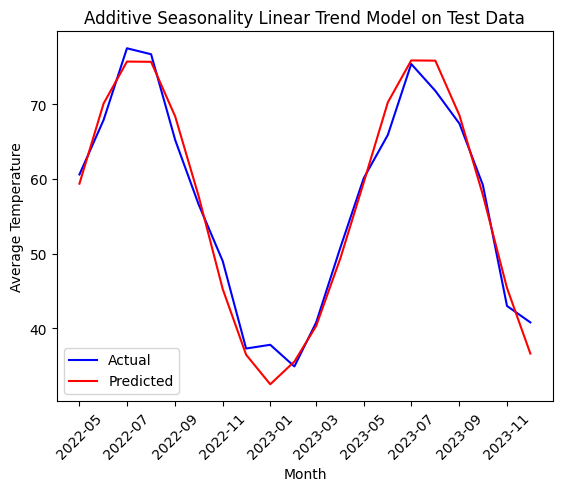

In [53]:
#Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.plot(Test['Temp_Avg'], color = 'blue', label='Actual')
plt.plot(forecast, color='red', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title(f'Additive Seasonality Linear Trend Model on Test Data')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Based on the least RMSE value: Final Model (Additive Seasonality Linear Model) for the entire dataset

In [54]:
#Fitting Additive Seasonality with Linear Trend Model on entire dataset
add_sea_linear = smf.ols('Temp_Avg~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=climate1).fit()

In [55]:
#Create a DataFrame for the next 10 periods
future_periods = pd.DataFrame({
    't': range(len(climate) + 1, len(climate) + 11),
    'Jan': 0, 'Feb': 0, 'Mar': 0, 'Apr': 0, 'May': 0, 'Jun': 0,
    'Jul': 0, 'Aug': 0, 'Sep': 0, 'Oct': 0, 'Nov': 0  # Set seasonal variables for future periods
})

#Use the fitted model to predict values for the next 10 periods
forecast = add_sea_linear.predict(future_periods)

In [56]:
# Create a DataFrame for the next 10 periods
future_periods = pd.DataFrame({
    'Month': pd.date_range(start='2024-01-01', periods=10, freq='MS'),  # Generate date range for the next 10 months
    'Forecasted_Temp': forecast.values  # Add forecasted temperature values
})

# Display the forecast values with dates
print(future_periods)

       Month  Forecasted_Temp
0 2024-01-01        37.305456
1 2024-02-01        37.319246
2 2024-03-01        37.333036
3 2024-04-01        37.346825
4 2024-05-01        37.360615
5 2024-06-01        37.374405
6 2024-07-01        37.388194
7 2024-08-01        37.401984
8 2024-09-01        37.415774
9 2024-10-01        37.429563


# 3. Time Series Forecasting using ARIMA Model

In [57]:
#Importing the Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
import matplotlib.pyplot as plt

In [58]:
#Read the Dataset
climate = pd.read_excel("Boston_Climate.xlsx")

In [59]:
#Converts the "Date" column in the "climate" DataFrame to a datetime format using Pandas' pd.to_datetime function
#and then sets the "Date" column as the index of the DataFrame using set_index.
climate['Date'] = pd.to_datetime(climate['Date'])
climate.set_index('Date', inplace=True)

In [60]:
climate.head()

,Temp_Avg
Date,
2016-01-01,32.5
2016-02-01,34.7
2016-03-01,42.5
2016-04-01,47.1
2016-05-01,58.6


Splitting Data

In [61]:
#Split the data into training and testing sets
train_size = int(len(climate) * 0.8)
Train, Test = climate[:train_size], climate[train_size:]

### Grid Search for Best Hyper parameters selection

In [62]:
p = d = q = range(0, 8)
pdq = list(itertools.product(p, d, q))

best_rmse = float('inf')
best_params = None

for param in pdq:
    try:
        model = ARIMA(Train, order=param)
        fit_model = model.fit()
        forecast = fit_model.forecast(steps=len(Test))
        rmse = sqrt(mean_squared_error(Test, forecast))

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = param

    except:
        continue

print(f'Best parameters: {best_params}, Best RMSE: {best_rmse}')

Best parameters: (4, 1, 3), Best RMSE: 2.1420130842679597


# Final ARIMA Model (based on the best parameters) Plot on Test Data

In [63]:
#Fit the ARIMA model
model = ARIMA(Train, order=best_params)
fit_model = model.fit()

Root Mean Squared Error (RMSE): 2.1420130842679597


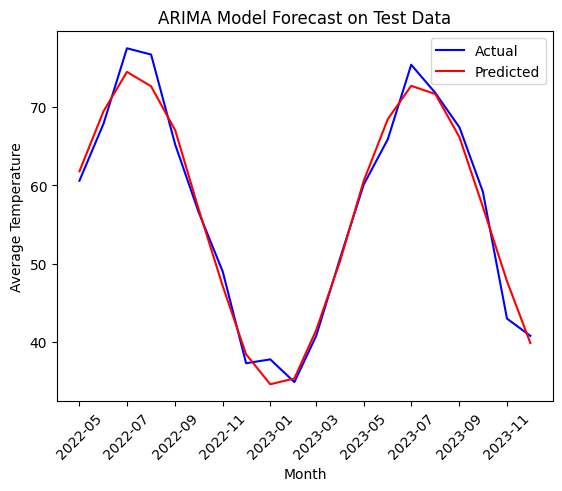

In [64]:
#Forecast the test set
forecast = fit_model.forecast(steps=len(Test))

#Calculate the RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(Test, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

#Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.plot(Test, color = 'blue', label='Actual')
plt.plot(forecast, color='red', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title(f'ARIMA Model Forecast on Test Data')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Final ARIMA Model based on the best parameters for the entire dataset

In [65]:
#Fit the final model with the best parameters
final_model = ARIMA(climate, order=(best_params))
final_fit_model = final_model.fit()

#Use the fitted model to predict values for the next 24 periods
forecast_next_24_periods = final_fit_model.forecast(steps=24)

In [66]:
#Create a DataFrame for the next 10 periods
future_periods = pd.DataFrame({
    'Month': pd.date_range(start='2024-01-01', periods=24, freq='MS'),  # Generate date range for the next 10 months
    'Forecasted_Temp': forecast_next_24_periods.values  # Add forecasted temperature values
})

#Display the forecast values with dates
print(future_periods)

        Month  Forecasted_Temp
0  2024-01-01        34.403101
1  2024-02-01        36.619610
2  2024-03-01        42.348689
3  2024-04-01        51.138919
4  2024-05-01        61.088625
5  2024-06-01        68.407269
6  2024-07-01        72.474709
7  2024-08-01        70.952690
8  2024-09-01        65.439006
9  2024-10-01        56.451883
10 2024-11-01        47.243650
11 2024-12-01        39.595047
12 2025-01-01        36.089863
13 2025-02-01        37.182888
14 2025-03-01        42.906865
15 2025-04-01        51.406894
16 2025-05-01        60.623572
17 2025-06-01        67.904618
18 2025-07-01        71.469638
19 2025-08-01        70.277774
20 2025-09-01        64.779478
21 2025-10-01        56.401592
22 2025-11-01        47.464009
23 2025-12-01        40.309632


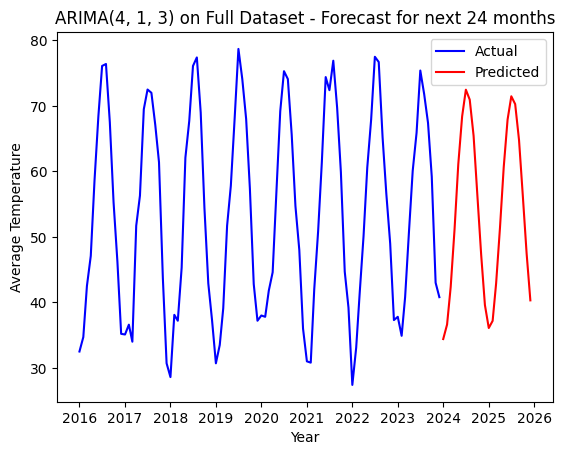

In [67]:
#Plot the actual vs. predicted values for the entire dataset
plt.plot(climate, color = 'blue', label='Actual')
plt.plot(forecast_next_24_periods, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title(f'ARIMA{best_params} on Full Dataset - Forecast for next 24 months')
plt.legend()
plt.show()